# The Financial Instruments Class 
Goal: Analyzing Financial Instruments efficiently 

## Financial Instrument Class

In [1]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
plt.style.use("seaborn")

C:\Users\FUTURE LAPTOP\AppData\Local\Temp\ipykernel_8628\1976654883.py:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


In [25]:
class FinancialInstrument(): # Parent Class
    '''Class to analyze financial instruments
    
    Attributes
    ==========
    ticker: str 
        ticker symbol with which to work
    start: str 
        start date for data retrieval
    end: str
        end date for data retrieval
        
    Methods
    =======
    get_data:
        retrieves daily price data(from yahoo finance) and prepares the data
    log_returns:
        calculates log returns
    plot_prices:
        creates a price chart 
    set_ticker:
        sets a new ticker 
    mean_return:
        calculates mean return
    std_returns:
        calculates the standard deviation of returns(risk)
    ''' 
    
    def __init__(self,ticker, start,end):
        self._ticker = ticker
        self.start  = start
        self.end    = end
        self.get_data()
        self.log_returns()
    
    
    def __repr__(self):
        ''' Class representation for a more readable format '''
        return "FinancialInstrument(ticker = {}, start = {}, end = {} )".format(self._ticker, self.start, self.end)
        
   
    def get_data(self):
        ''' Retrieves (from Yahoo Finance) and prepares the data'''
        raw = yf.download(self._ticker, self.start, self.end).Close.to_frame()
        raw.rename(columns = {"Close":"price"}, inplace = True)
        self.data = raw
     

    def log_returns(self):
        ''' Calculates Log Returns'''
        self.data["log_returns"] = np.log(self.data.price/self.data.price.shift(1))
     
    
    def plot_prices(self):
        ''' Creates a Price Chart'''
        self.data.price.plot(figsize = (12,8))
        plt.title("Price Chart: {}".format(self._ticker), fontsize = 15)
        
    def plot_returns(self, kind = "ts"):
        '''plots log returns either as time series ("ts") or as histogram ("hist")'''  
        if kind == "ts":
            self.data.log_returns.plot(figsize =(12,8))
            plt.title("Returns:{}".format(self._ticker), fontsize = 15)
        elif kind == "hist":
            self.data.log_returns.hist(figsize = (12,8), bins = int(np.sqrt(len(self.data))))
            plt.title("Frequency of Returns: {}".format(self._ticker), fontsize = 15)
    
    
    def set_ticker(self, ticker = None):
        ''' Sets a new ticker'''
        if ticker is not None: 
            self._ticker = ticker
            self.get_data()
            self.log_returns()
        
        

In [26]:
class RiskReturn(FinancialInstrument):  # Child Class
    
    '''This a Child Class to FinancialInstrument Class used for calculating risk and returns.
    
    Attributes
    ==========
    freq: str
        used to retrieve periodic data such as 'd' daily, 'w' weekly, 'm' monthly, 'q' quarterly and 'y' yearly. 
    
    Methods
    =======
    mean_return:
        calculates mean return
    std_returns:
        calculates the standard deviation of returns(risk)
    annualized_perf:
        Calculates annualized returns and risk
        
    '''
    
    
    def __init__(self, ticker, start, end, freq = None): 
        self.freq = freq
        super().__init__(ticker,start,end) # With Super function we can re access the dunder init attributes from
                                           # the parent class.
    
    
     # Class representation for a more readable format, in this case the child class's method will overwride the parent's 
     # method.
    
    def __repr__(self):
        '''Class representation for a more readable format, in this case the child class's method will overwride the parent's 
           method.''' 
        return "RiskReturn(ticker = {}, start = {}, end = {} )".format(self._ticker, self.start, self.end)
    
    def mean_return(self):
        '''Calculates mean return''' 
        if self.freq is None:
            return self.data.log_returns.mean()
        else:
            resampled_price = self.data.price.resample(self.freq).last()
            resampled_returns = np.log(resampled_price/ resampled_price.shift(1))
            return resampled_returns.mean()
        
    def std_returns(self):
        '''Calculates standard deviation of returns (risk) ''' 
        if self.freq is None:
            return self.data.log_returns.std()
        else: 
            resampled_price = self.data.price.resample(self.freq).last()
            resampled_returns = np.log(resampled_price/resampled_price.shift(1))
            return resampled_returns.std()
        
    def annualized_perf(self):
        '''Calculates annualized returns and risk''' 
        mean_return = round(self.data.log_returns.mean()*252,3)  # Rounded to three decimal places
        risk = round(self.data.log_returns.std()*np.sqrt(252),3) # Rounded to three decimal places
        print("Return:{} | Risk: {}".format(mean_return, risk))
        

In [27]:
stock = FinancialInstrument("aapl", "2015-01-01", "2019-01-01")

[*********************100%***********************]  1 of 1 completed


In [28]:
stock

FinancialInstrument(ticker = aapl, start = 2015-01-01, end = 2019-01-01 )

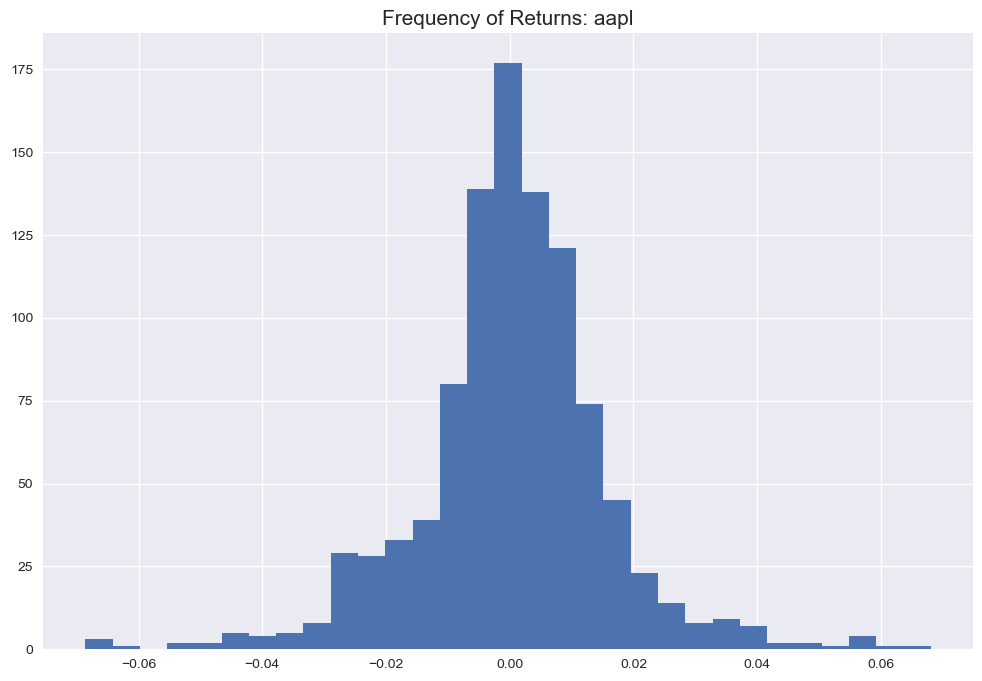

In [29]:
stock.plot_returns("hist")

In [31]:
stock.data

,price,log_returns
Date,,
2015-01-02,27.332500,NaN
2015-01-05,26.562500,-0.028576
2015-01-06,26.565001,0.000094
2015-01-07,26.937500,0.013925
2015-01-08,27.972500,0.037703
...,...,...
2018-12-24,36.707500,-0.026215
2018-12-26,39.292500,0.068053
2018-12-27,39.037498,-0.006511


### The Method Get Data

### Instantiation 

### Attributes 

### Methods